In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [3]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

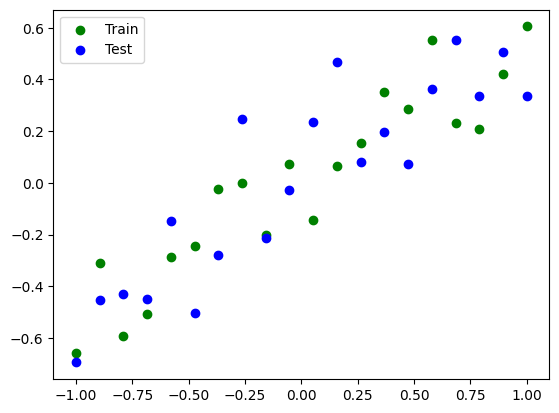

In [5]:
plt.scatter(X_train, y_train, c="green", label = "Train")
plt.scatter(X_test, y_test, c="blue", label = "Test")
plt.legend()
plt.show()

Regression model


In [6]:
model = Sequential()
model.add(Dense(128, input_dim=1,activation= "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss = 'mse', optimizer = adam, metrics = ["mse"])
history = model.fit(X_train, y_train, epochs = 400, validation_data = (X_test,y_test), verbose = False)

In [8]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0038125242572277784, Test: 0.0473349429666996


In [9]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


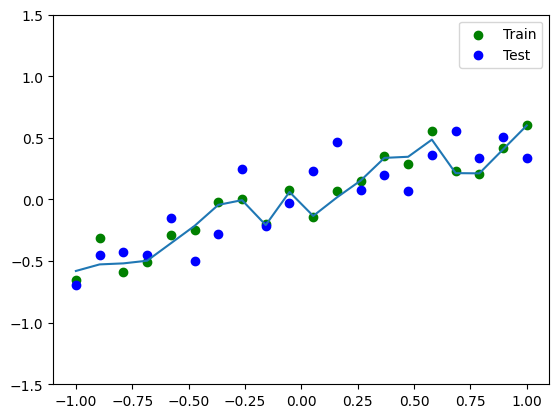

In [13]:
plt.figure()
plt.scatter(X_train, y_train, c="green", label = "Train")
plt.scatter(X_test, y_test, c="blue", label = "Test")
plt.plot(X_test, y_pred)
plt.ylim((-1.5, 1.5))
plt.legend()
plt.show()

Dropout model on regression

In [14]:
model_dropout = Sequential()
model_dropout.add(Dense(128, input_dim=1,activation= "relu"))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(128, activation = "relu"))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation = "linear"))
adam = Adam(learning_rate=0.01)
model_dropout.compile(loss = 'mse', optimizer = adam, metrics = ["mse"])
history = model_dropout.fit(X_train, y_train, epochs = 400, validation_data = (X_test,y_test), verbose = False)

In [18]:
y_pred_dropout = model_dropout.predict(X_test)

1/1 [==============================] - 0s 44ms/step


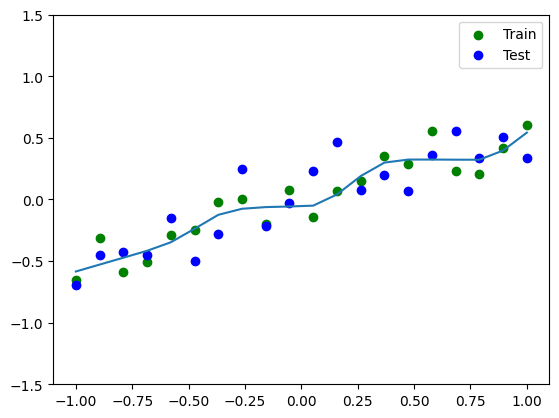

In [19]:
plt.figure()
plt.scatter(X_train, y_train, c="green", label = "Train")
plt.scatter(X_test, y_test, c="blue", label = "Test")
plt.plot(X_test, y_pred_dropout)
plt.ylim((-1.5, 1.5))
plt.legend()
plt.show()